In [18]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point
from tqdm.notebook import tqdm


In [19]:
COUNTY1 = 'New Richmond, Ohio Township'
COUNTY2 = 'Ohio Township Exclude, Clermont County'

In [20]:
buildings = pd.read_csv('cincy_building_centroids_2023_11_08.csv')
s1 = gpd.read_file('New Richmond NEW.geojson')['geometry'][0]
s2 = gpd.read_file('Ohio Township Exclude NEW.geojson')['geometry'][0]

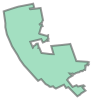

In [21]:
s1

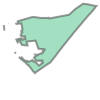

In [22]:
s2

In [23]:
buildings.columns = ['building_id', 'centroid_latitude', 'centroid_longitude', 'name']

In [24]:
buildings['centroid'] = [Point(x,y) for x,y in zip(buildings['centroid_longitude'], buildings['centroid_latitude'])]

In [25]:
buildings[buildings.name == COUNTY1].head()

,building_id,centroid_latitude,centroid_longitude,name,centroid
6,7258540,38.968350,-84.294775,"New Richmond, Ohio Township",POINT (-84.294775 38.96835)
9,7256806,38.953342,-84.253545,"New Richmond, Ohio Township",POINT (-84.253545 38.953342)
10,7256805,38.953556,-84.253723,"New Richmond, Ohio Township",POINT (-84.253723 38.953556)
11,7256798,38.953556,-84.253723,"New Richmond, Ohio Township",POINT (-84.253723 38.953556)
12,7256556,38.955442,-84.272657,"New Richmond, Ohio Township",POINT (-84.272657 38.955442)


In [26]:
def new_neighborhood(p):
    if s1.contains(p):
        return COUNTY1
    elif s2.contains(p):
        return COUNTY2
    else:
        return None

In [27]:
buildings['new_name'] = [new_neighborhood(x) for x in tqdm(buildings['centroid'], total=len(buildings))]

  0%|          | 0/2391 [00:00<?, ?it/s]

In [28]:
buildings_to_change = buildings[((buildings['name'] != buildings['new_name']) & (buildings['new_name'].isin([COUNTY1, COUNTY2]))) | (~(buildings.centroid_latitude.isna()) & (buildings['name'].isin([COUNTY1, COUNTY2])) & (buildings['new_name'].isna()))][['building_id', 'name', 'new_name']]
buildings_to_change.to_csv('buildings_to_change.csv', index=False)

In [29]:
buildings_to_change.groupby(['name', 'new_name'])['building_id'].nunique()

name                                    new_name                              
New Richmond, Ohio Township             Ohio Township Exclude, Clermont County    37
Ohio Township Exclude, Clermont County  New Richmond, Ohio Township               20
Name: building_id, dtype: int64

In [30]:
len(buildings[(~(buildings.centroid_latitude.isna()) & (buildings['name'].isin([COUNTY1, COUNTY2])) & (buildings['new_name'].isna()))])

2

In [31]:
forestville = pd.read_csv('cincy_building_centroids_2023_11_08 (1).csv')
forestville.head()

,id,centroid_latitude,centroid_longitude,name
0,7258496,39.061684,-84.354530,Forestville
1,7258297,39.061684,-84.354530,Forestville
2,7258293,39.061684,-84.354530,Forestville
3,7258236,39.061185,-84.354184,Forestville
4,7258119,39.061345,-84.354143,Forestville


In [32]:
forestville['new_name'] = 'Anderson Township, Hamilton County'
forestville = forestville[['id', 'name', 'new_name']]
forestville.columns = ['building_id', 'name', 'new_name']
print(len(buildings_to_change))
buildings_to_change = pd.concat([buildings_to_change, forestville])
print(len(buildings_to_change))
buildings_to_change.to_csv('buildings_to_change.csv')

59
4465
